In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

**計算匯率波動度**

In [2]:
exchange_rate = pd.read_csv("foreign data.csv")
exchange_rate = exchange_rate.iloc[1:, :]
exchange_rate.columns = ["Date", "Rate"]

#計算年化波動度(乘以365年化)
exchange_return = exchange_rate.Rate.diff()[1:] / exchange_rate.Rate
exchange_return.std() * np.sqrt(365)

0.085917824700800671

**檢視匯率走勢**

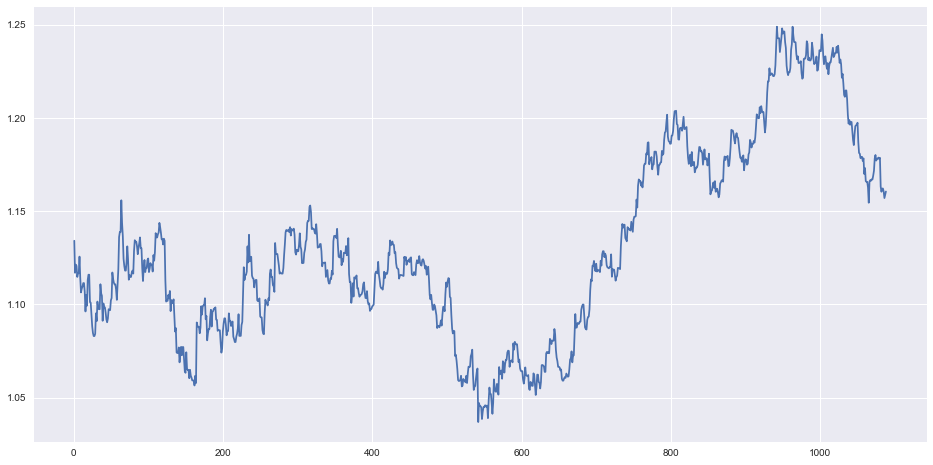

In [3]:
plt.figure(figsize = (16, 8))
plt.plot(exchange_rate.Rate);

**檢視匯率報酬**

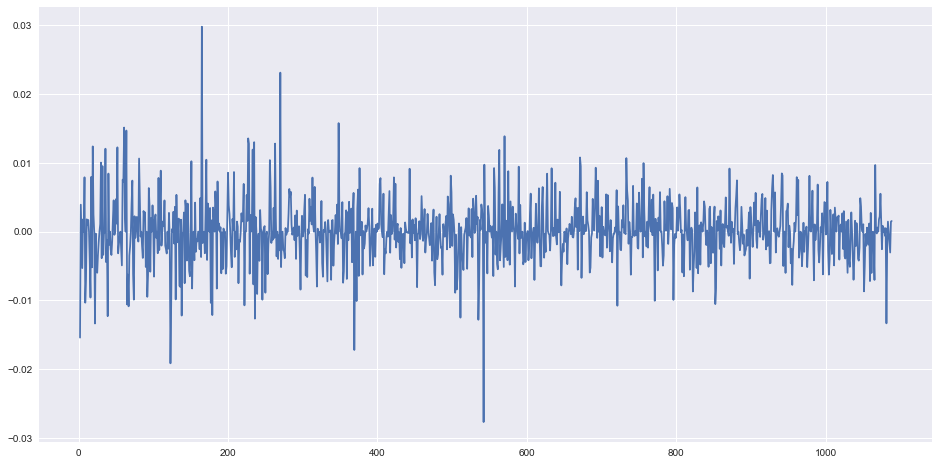

In [4]:
plt.figure(figsize = (16, 8))
plt.plot(exchange_return);

# 分析 (給定3 months interest rate, US: 1.933%, EU: 2.332%)

In [5]:
#給定數值
US_interest = 0.01933
EU_interest = 0.02332
Capital = 10000
F = 0
T = 1/4
r = US_interest

#定義公式計算選擇權價格
def Black_Put(stock_price, K, Vol, T):
    if T > 0:
        d1 = (np.log(stock_price / K) + ((US_interest - EU_interest) + 0.5 * (Vol**2)) * T) / (Vol * np.sqrt(T))
        d2 = d1 - Vol * np.sqrt(T)       
    else:  
        if stock_price >= K:
            d1 = 99999
            d2 = d1 - Vol * np.sqrt(T)
        else:
            d1 = -99999
            d2 = d1 - Vol * np.sqrt(T)
            
    Put = K * np.exp(-US_interest * T) * norm.cdf(-d2) - stock_price * np.exp(-EU_interest * T) * norm.cdf(-d1)
    return(Put)

#定義公式計算vt
def calculate_vt(t, put, K):
    return Capital * np.exp(r * t) - (1 - F) * (Capital * np.exp(r * T) / K) * put


#定義公式計算rt
def calculate_rt(t):
    return Capital * np.exp(r * t)

In [6]:
#準備所需資料
temp_exchange_rate = exchange_rate.Rate
temp_exchange_rate = exchange_rate.Rate[-90 :]
temp_time = np.linspace(1/4, 0, 90) #t遞減

temp_data = pd.DataFrame([temp_time, temp_exchange_rate]).T
temp_data.columns = ["t", "S"]

**價外與賣權走勢，給定K = 1.12**

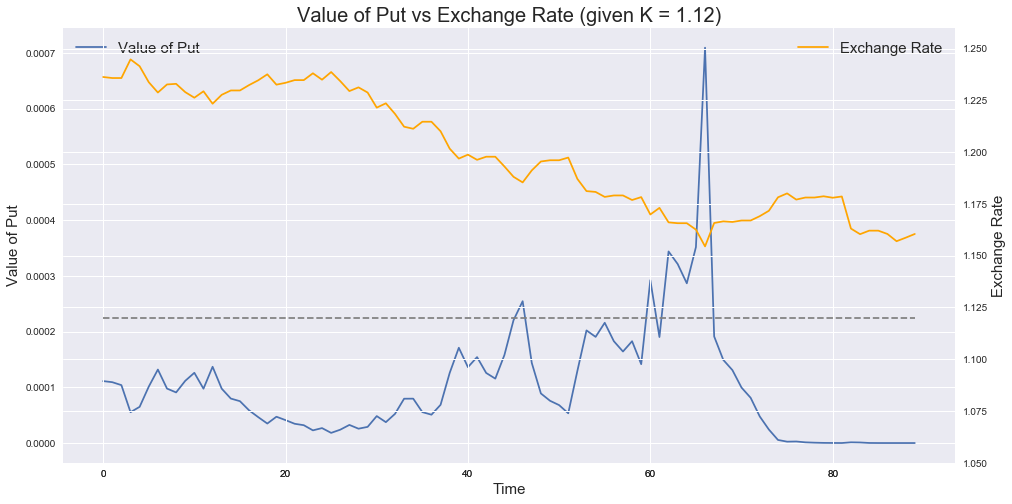

In [7]:
#價外
K = 1.12
temp_exchange_rate = exchange_rate.Rate
temp_exchange_rate = exchange_rate.Rate[-90 :]
temp_time = np.linspace(1/4, 0, 90)

temp_data = pd.DataFrame([temp_time, temp_exchange_rate]).T
temp_data.columns = ["t", "S"]

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.08, x["t"]), axis = 1)

#plot
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(111)
ax1.plot(np.arange(90), temp_put, label = "Value of Put")
plt.ylabel('Value of Put', fontsize = 15)

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(np.arange(90), temp_exchange_rate, c = "orange", label = "Exchange Rate")
ax2.plot(np.arange(90), [K] * 90, ls = "--", c = "grey")
ax1.legend(loc = 2, fontsize = 15)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_y = np.arange(1.1, 1.3, 0.1)
plt.ylabel('Exchange Rate', fontsize = 15)
ax2.legend(fontsize = 15)
plt.xlabel("Time", fontsize = 15)

plt.title("Value of Put vs Exchange Rate (given K = 1.12)", fontsize = 20)
ax2.set_ylim([1.05, 1.26]);

**價內與賣權走勢，給定K = 1.2**

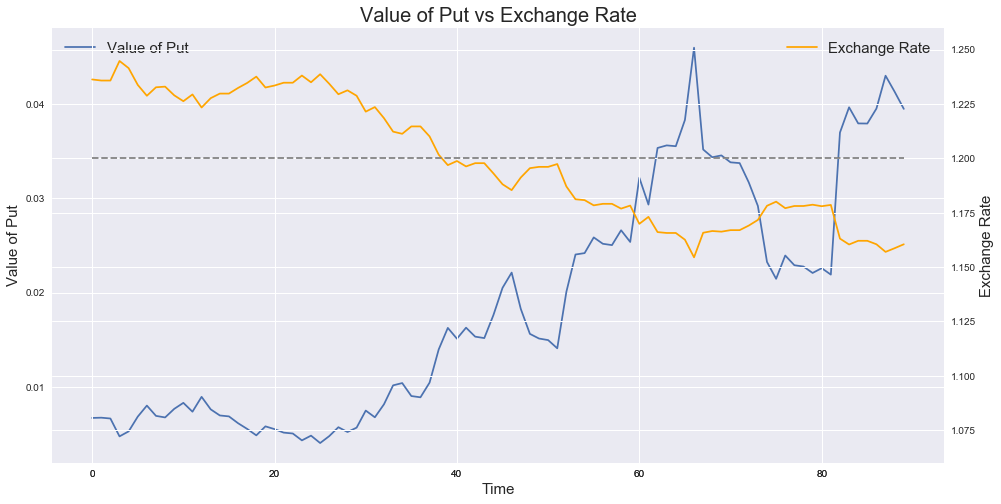

In [8]:
#價內
K = 1.2
temp_exchange_rate = exchange_rate.Rate
temp_exchange_rate = exchange_rate.Rate[-90 :]
temp_time = np.linspace(1/4, 0, 90)

temp_data = pd.DataFrame([temp_time, temp_exchange_rate]).T
temp_data.columns = ["t", "S"]

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.08, x["t"]), axis = 1)

#plot
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(111)
ax1.plot(np.arange(90), temp_put, label = "Value of Put")
plt.ylabel('Value of Put', fontsize = 15)

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(np.arange(90), temp_exchange_rate, c = "orange", label = "Exchange Rate")
ax2.plot(np.arange(90), [K] * 90, ls = "--", c = "grey")
ax1.legend(loc = 2, fontsize = 15)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_y = np.arange(1.1, 1.3, 0.1)
plt.ylabel('Exchange Rate', fontsize = 15)
ax2.legend(fontsize = 15)
plt.xlabel("Time", fontsize = 15)


plt.title("Value of Put vs Exchange Rate", fontsize = 20)
ax2.set_ylim([1.06, 1.26]);

# 以下比較$V_{t}$  與  $B_{0}e^{rt}$

**價外，給定K = 1.12**

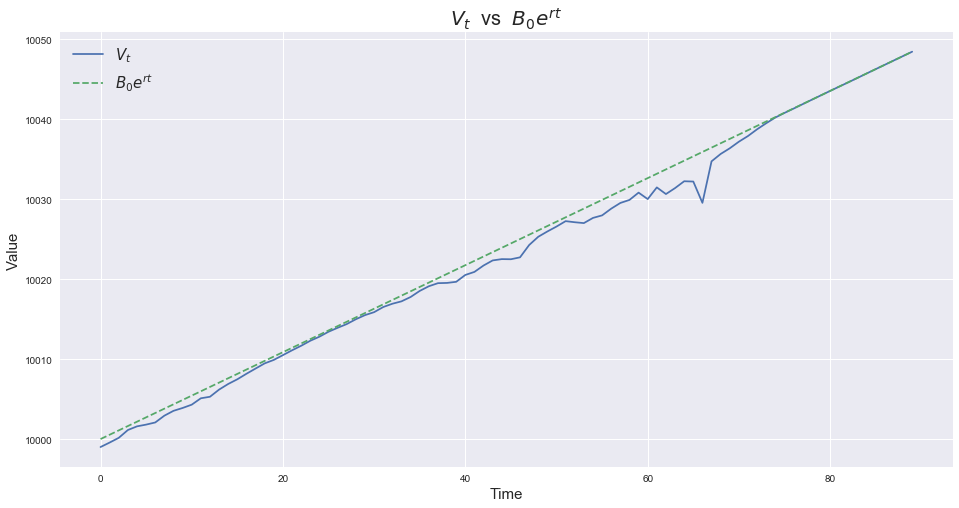

In [9]:
#價外
K = 1.12

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.08, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]


temp_vt = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

#plot
plt.figure(figsize = (16, 8))
plt.plot(temp_vt, label = "$V_{t}$")
plt.plot(temp_rt, ls = "--", label = "$B_{0}e^{rt}$")
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.title("$V_{t}$  vs  $B_{0}e^{rt}$", fontsize = 20)
plt.legend(fontsize = 15);

**價外，給定K = 1.12，Vol敏感性分析**

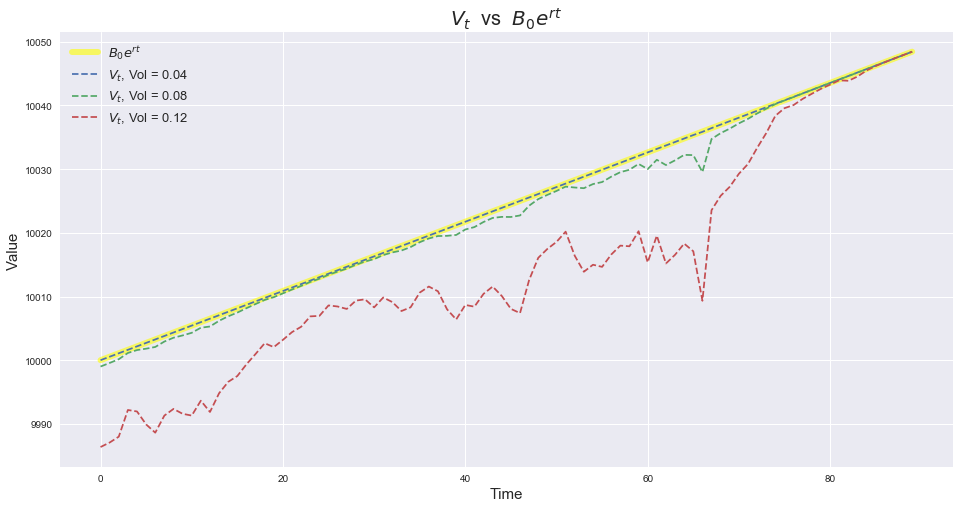

In [10]:
K = 1.12

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.04, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt2 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt2 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.08, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt1 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt1 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.12, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt3 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt3 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(temp_rt1, lw = 6, label = "$B_{0}e^{rt}$", alpha = 0.6, c = "yellow")

plt.plot(temp_vt2, ls = "--", label = "$V_{t}$, Vol = 0.04")

plt.plot(temp_vt1, ls = "--", label = "$V_{t}$, Vol = 0.08")

plt.plot(temp_vt3, ls = "--", label = "$V_{t}$, Vol = 0.12")

plt.xlabel("Time", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.title("$V_{t}$  vs  $B_{0}e^{rt}$", fontsize = 20)
plt.legend(fontsize = 13);

**價外，給定Vol = 0.08，K敏感性分析(深價外)**

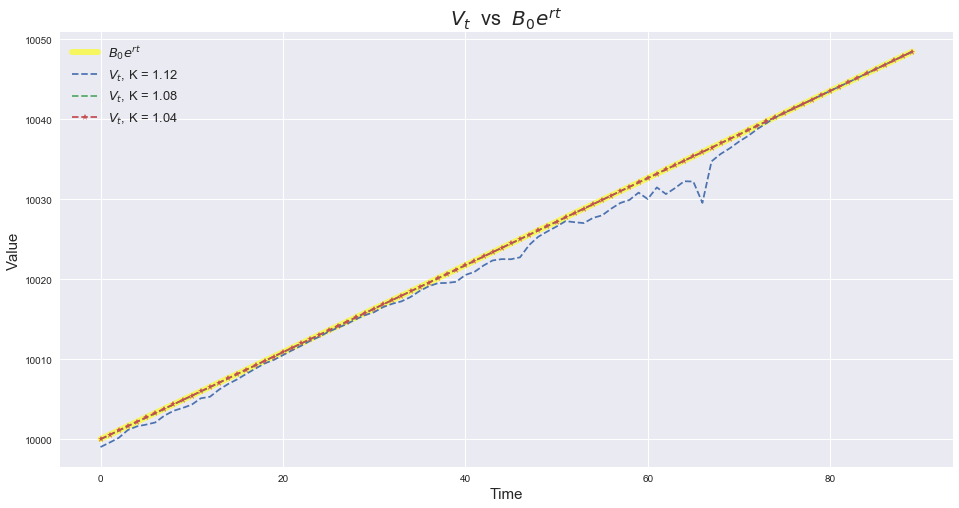

In [11]:
Vol = 0.08

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], 1.12, Vol, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt1 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt1 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], 1.08, Vol, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt2 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt2 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], 1.04, Vol, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt3 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt3 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(temp_rt1, label = "$B_{0}e^{rt}$", lw = 6, c= "yellow", alpha = 0.6)

plt.plot(temp_vt1, ls = "--", label = "$V_{t}$, K = 1.12")

plt.plot(temp_vt2, ls = "--", label = "$V_{t}$, K = 1.08")

plt.plot(temp_vt3, ls = "--", label = "$V_{t}$, K = 1.04", marker = "*")
plt.title("$V_{t}$  vs  $B_{0}e^{rt}$", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.legend(fontsize = 13);

**價內，給定K = 1.2**

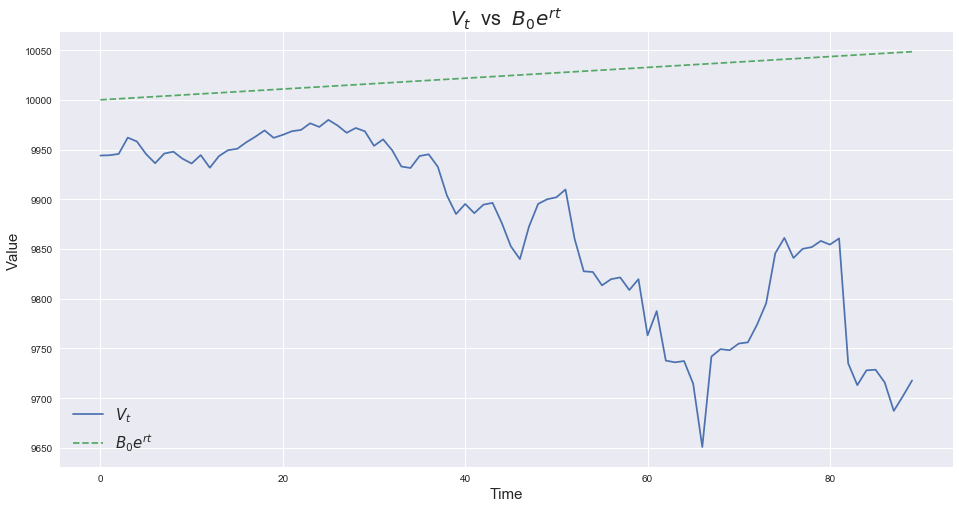

In [12]:
#價外
K = 1.2

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.08, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]


temp_vt = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(temp_vt, label = "$V_{t}$")
plt.plot(temp_rt, ls = "--", label = "$B_{0}e^{rt}$")

plt.xlabel("Time", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.title("$V_{t}$  vs  $B_{0}e^{rt}$", fontsize = 20)
plt.legend(fontsize = 15);

**價內，給定K = 1.2,，Vol敏感性分析**

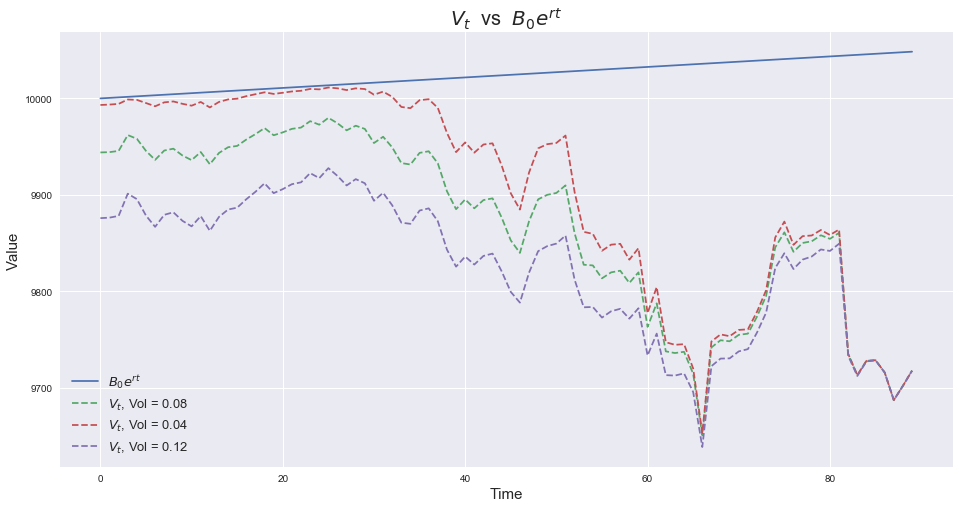

In [13]:
K = 1.2

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.08, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt1 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt1 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.04, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt2 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt2 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], K, 0.12, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt3 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt3 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(temp_rt1, label = "$B_{0}e^{rt}$")

plt.plot(temp_vt1, ls = "--", label = "$V_{t}$, Vol = 0.08")

plt.plot(temp_vt2, ls = "--", label = "$V_{t}$, Vol = 0.04")

plt.plot(temp_vt3, ls = "--", label = "$V_{t}$, Vol = 0.12")
plt.title("$V_{t}$  vs  $B_{0}e^{rt}$", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.legend(fontsize = 13);

**價內，給定Vol = 0.08，K敏感性分析(深價內)**

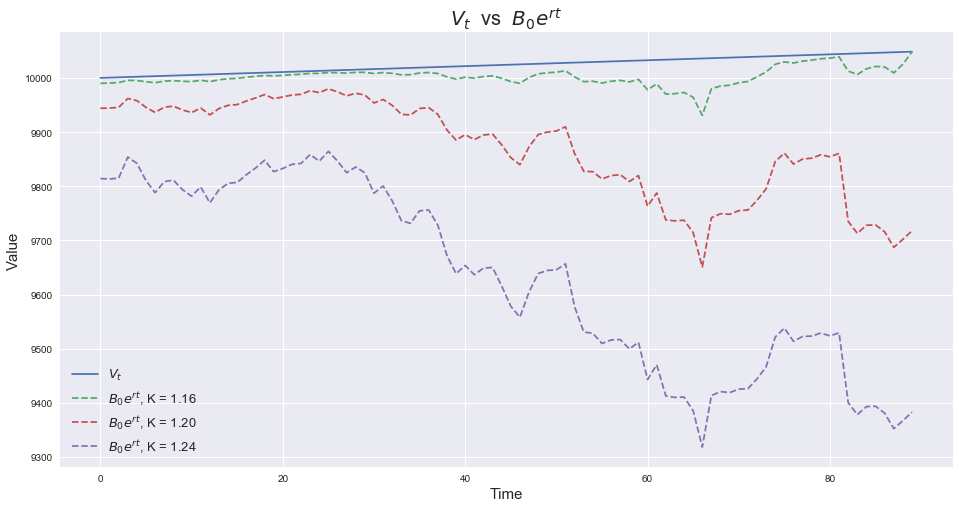

In [14]:
Vol = 0.08

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], 1.16, Vol, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt1 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt1 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], 1.2, Vol, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt2 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt2 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

temp_put = temp_data.apply(lambda x : Black_Put(x["S"], 1.24, Vol, x["t"]), axis = 1)
temp_data2 = pd.DataFrame([np.linspace(0, 1/4, 90), temp_put]).T
temp_data2.columns = ["t", "put"]
temp_vt3 = temp_data2.apply(lambda x : calculate_vt(x["t"], x["put"], K), axis = 1)
temp_rt3 = temp_data2.apply(lambda x : calculate_rt(x["t"]), axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(temp_rt1, label = "$V_{t}$")

plt.plot(temp_vt1, ls = "--", label = "$B_{0}e^{rt}$, K = 1.16")

plt.plot(temp_vt2, ls = "--", label = "$B_{0}e^{rt}$, K = 1.20")

plt.plot(temp_vt3, ls = "--", label = "$B_{0}e^{rt}$, K = 1.24")
plt.title("$V_{t}$  vs  $B_{0}e^{rt}$", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.legend(fontsize = 13);

# Vol與K各種組合下對$V_{T}$的影響

In [15]:
#計算各種組合
vols = np.arange(0, 1.04, 0.01)
Ks = np.arange(1.08, 1.25, 0.01)

result = pd.DataFrame([])
for vol in vols:
    for k in Ks:
        temp_result = temp_data
        temp_result["Vol"] = vol
        temp_result["K"] = k
        temp_result["Put"] = temp_result.apply(lambda x : Black_Put(x["S"], x["K"], x["Vol"], x["t"]), axis = 1)
        temp_result["t2"] = np.linspace(0, 1/4, 90)
        temp_result["vt"] = temp_result.apply(lambda x : calculate_vt(x["t"], x["Put"], x["K"]), axis = 1)
        temp_result["rt"] = temp_rt
        
        result = pd.concat([result, temp_result])

C:\Users\andy5\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


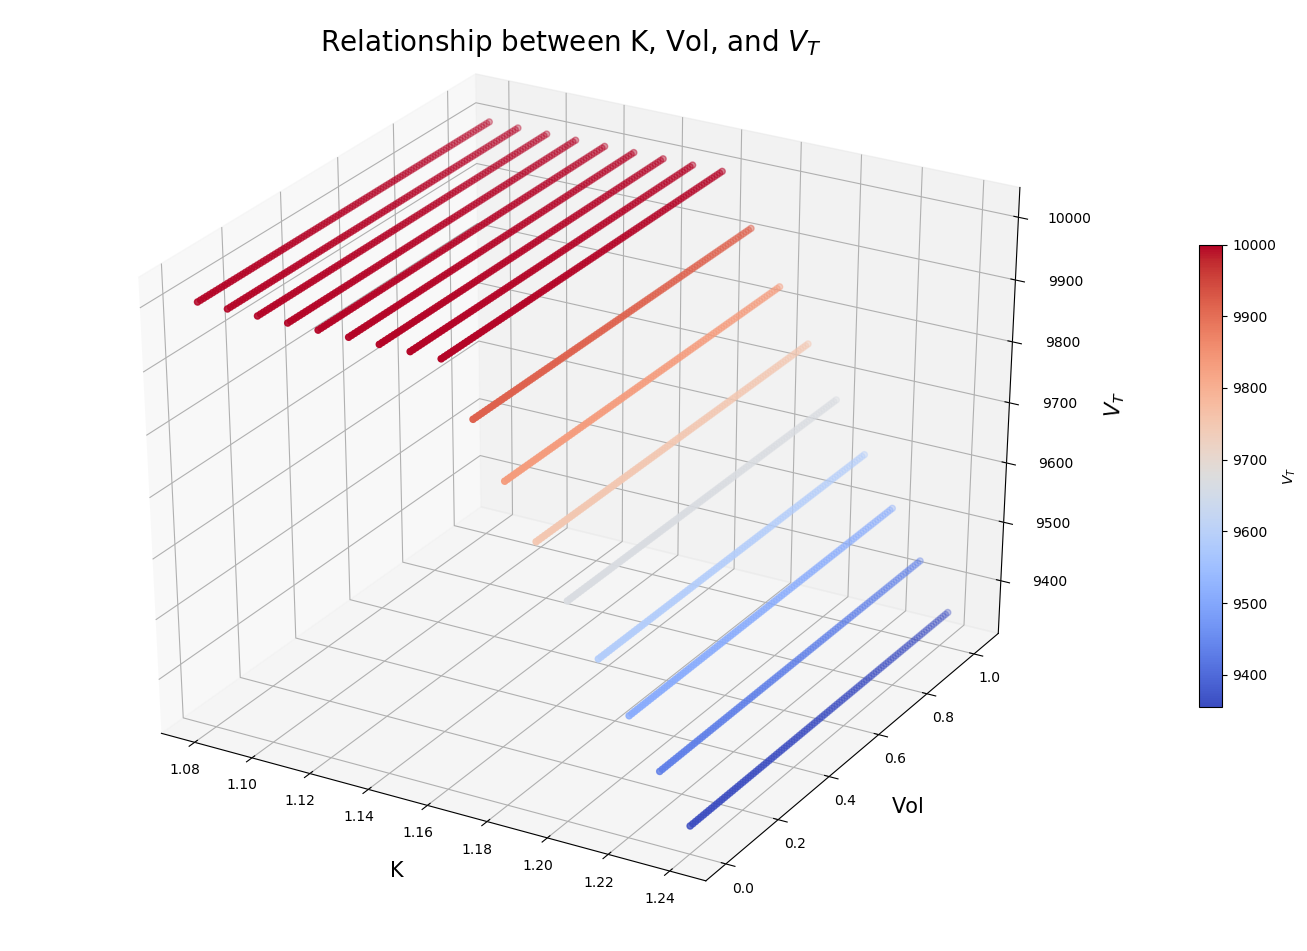

In [16]:
plt.style.use("default")
fig = plt.figure(figsize = (18,12))
ax = plt.axes(projection='3d')

X = result.K[89].values
Y = result.Vol[89].values
Z = result.vt[89].values
scatter = ax.scatter(X, Y, Z ,c = Z, cmap=cm.coolwarm)

ax.set_ylabel("Vol", fontsize = 15, labelpad=15)
ax.set_xlabel("K", fontsize = 15, labelpad=15)
ax.set_zlabel("$V_{T}$", fontsize = 15, labelpad=28)

ax.tick_params(axis='z', which='major', pad=15)

Title = plt.title("Relationship between K, Vol, and $V_{T}$", fontsize=20)
Title.set_y(0.95)

fig.colorbar(scatter, shrink=0.5, aspect=20, label = "$V_{T}$");